In [1]:
import Pkg;
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("Missings")
Pkg.add("Statistics")

    Updating registry at `C:\Users\ardwived\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\ardwived\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
   Installed Rmath ─────────────── v0.7.0
   Installed Parsers ───────────── v1.1.2
   Installed PDMats ────────────── v0.11.1
   Installed Lathe ─────────────── v0.1.8
   Installed Rmath_jll ─────────── v0.3.0+0
   Installed GPUCompiler ───────── v0.10.0
   Installed NNlib ────

In [6]:
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase
using Missings

In [12]:
using CSV,DataFrames
df = DataFrame(CSV.File("C:\\Users\\ardwived\\Downloads\\nystocks.csv"))


,date,symbol,open,close,low,high,volume
,String,String,Float64,Float64,Float64,Float64,Int64
1,04-01-2010,A,31.39,31.3,31.13,31.63,3815500
2,04-01-2010,AAP,40.7,40.38,40.36,41.04,1701700
3,04-01-2010,AAPL,213.43,214.01,212.38,214.5,123432400
4,04-01-2010,ABC,26.29,26.63,26.14,26.69,2455900
5,04-01-2010,ABT,54.19,54.46,53.92,54.56,10829000
6,04-01-2010,ACN,41.52,42.07,41.5,42.2,3650100
7,04-01-2010,ADBE,36.65,37.09,36.65,37.3,4710200
8,04-01-2010,ADI,31.79,31.67,31.61,32.19,2102700
9,04-01-2010,ADM,31.48,31.47,31.33,31.84,3472500


In [13]:
#Summary Statistics
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,date,,04-01-2010,,06-01-2010,0,String
2,symbol,,A,,ZION,0,String
3,open,46.9074,1.53,37.07,627.181,0,Float64
4,close,47.0407,1.61,37.25,626.751,0,Float64
5,low,46.4453,1.51,36.74,624.241,0,Float64
6,high,47.4197,1.61,37.76,629.511,0,Float64
7,volume,7.01361e6,10000,3.0912e6,215620200,0,Int64


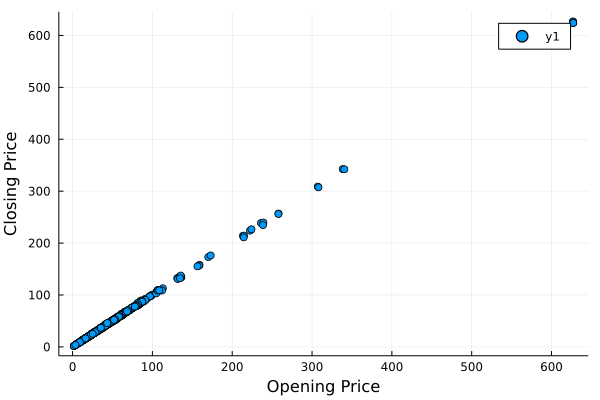

In [14]:
#Correlation Analysis
scatter(df.open,df.close,xlabel="Opening Price",ylabel="Closing Price")

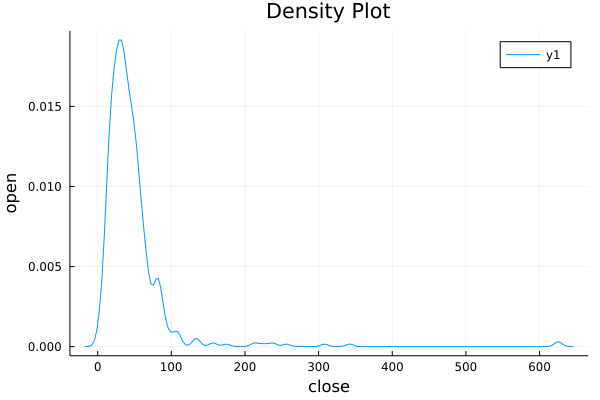

In [15]:
#Distribution Analysis
density(df.close,title="Density Plot", ylabel="open",xlabel="close",legend=true)

In [16]:
#Split data
using Lathe.preprocess:TrainTestSplit
train,test=TrainTestSplit(df,.75)

(754×7 DataFrame
 Row │ date        symbol  open     close    low      high     volume    
     │ String      String  Float64  Float64  Float64  Float64  Int64     
─────┼───────────────────────────────────────────────────────────────────
   1 │ 04-01-2010  A         31.39    31.3     31.13    31.63    3815500
   2 │ 04-01-2010  AAP       40.7     40.38    40.36    41.04    1701700
   3 │ 04-01-2010  AAPL     213.43   214.01   212.38   214.5   123432400
   4 │ 04-01-2010  ABC       26.29    26.63    26.14    26.69    2455900
   5 │ 04-01-2010  ACN       41.52    42.07    41.5     42.2     3650100
   6 │ 04-01-2010  ADBE      36.65    37.09    36.65    37.3     4710200
   7 │ 04-01-2010  ADM       31.48    31.47    31.33    31.84    3472500
   8 │ 04-01-2010  AEP       35.1     34.94    34.8     36.0     4076600
   9 │ 04-01-2010  AES       13.38    13.67    13.38    13.7     4597600
  10 │ 04-01-2010  AIG       30.53    29.89    29.41    30.54    7750900
  11 │ 04-01-2010  AIZ       29

In [18]:
#..........................................linear regression Model..............................................................
#GLM Generalized linear Model
using GLM
fm =@formula(open~close)
linreg = lm(fm,train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

open ~ 1 + close

Coefficients:
────────────────────────────────────────────────────────────────────────────
                 Coef.   Std. Error        t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.191229  0.0365193      -5.24    <1e-06  -0.262921  -0.119537
close         1.00133   0.000492287  2034.04    <1e-99   1.00037    1.0023
────────────────────────────────────────────────────────────────────────────

In [19]:
#R squared Value
r2(linreg)

0.999818272860644

In [28]:
#Prediction
test_pred=predict(linreg,test)
train_pred=predict(linreg,train)

754-element Vector{Union{Missing, Float64}}:
  31.15044887761849
  40.24253905843652
 214.10372747464402
  26.47422868724398
  41.934788322036994
  36.94815736383504
  31.320673232966364
  34.795293599424355
  13.496973219037862
  29.738569434982608
  30.00892994609616
  22.16850416241717
  25.76328431100052
   ⋮
  78.92397658895311
  77.57218104270598
 108.87380228369621
  45.70980814380836
  53.30991436323664
  28.006266910673688
 234.7912366305582
  51.87801029290957
  25.062351247271135
   8.980968074160184
  36.54762375541902
   3.453618096394156

In [31]:
#Mesuring Performance (for test)
perf_test=df_original=DataFrame(y_original=test[!,:open],y_pred=test_pred)
perf_test.error=perf_test[!,:y_original]-perf_test[!,:y_pred]
perf_test.error_sq=perf_test.error.*perf_test.error

246-element Vector{Float64}:
 0.022886776413361117
 0.07239353229768332
 0.7126697935588812
 0.6185886561961498
 0.009418618731923473
 0.1800022296833373
 0.6283898676796695
 0.2046822474551357
 0.008986965452359781
 0.00010342799647887433
 0.02668775391548375
 0.4234272098259942
 3.814648023271679
 ⋮
 6.600340815326158
 0.028806343119076136
 0.1269883000967593
 0.02215931951463548
 0.035799262526384885
 0.016915109490918564
 0.02890106774312203
 0.24144176925710883
 0.000570386554418676
 0.2248297091105762
 0.20865059050247148
 0.012077888394932951

In [32]:
#Mesuring Performance (for train)
perf_train=df_original=DataFrame(y_original=train[!,:open],y_pred=train_pred)
perf_train.error=perf_train[!,:y_original]-perf_train[!,:y_pred]
perf_train.error_sq=perf_train.error.*perf_train.error

754-element Vector{Float64}:
  0.05738426113299587
  0.20927142797902876
  0.4539114050040879
  0.03393984074726533
  0.1720493520982622
  0.08889662098360285
  0.025385018693390736
  0.09284477173016296
  0.013682733972079501
  0.6263639221058759
  0.09543709373608382
  0.18618865785130775
  0.017764974128504477
  ⋮
  0.19893955935136662
  0.17457100980243462
  0.09229825801329845
  5.474706829449209
  0.0440648795544987
  0.22442303992265222
 13.829163810293547
  0.0017629675467115578
  0.011588253964080746
  0.007926683818746458
  1.3400950743589335
  0.011317109414803128

In [36]:
#Loss Function
#MAPE
function mape(perf_df)
    mape=mean(abs.(perf_df.error./perf_df.y_original))
    return
end

mape (generic function with 1 method)

In [34]:
#RMSE
function rmse(perf_df)
    rmse=sqrt(mean(perf_df.error.*perf_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [40]:
#Now printout the values of MAPE and RMSE and visualize them in form of Histogram, to understand didtribution better
#1) test
println("Mean Absolute test error:",mean(abs.(perf_test.error)),"\n")
println("Mean Absolute Percentage test error:",mape(perf_test),"\n")
println("Root Mean test error:",rmse(perf_test),"\n")
println("Mean Square test error:",mean(perf_test.error_sq),"\n")

Mean Absolute test error:0.4437680676495037

Mean Absolute Percentage test error:nothing

Root Mean test error:0.6317363630786843

Mean Square test error:0.3990908324358832



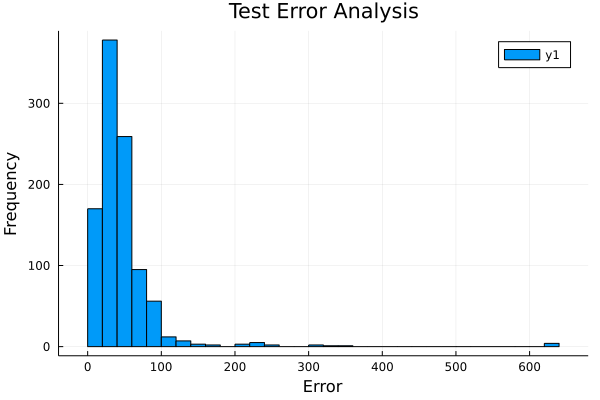

In [41]:
#histogram
#1)test
histogram(df.open,bins=50,title="Test Error Analysis",ylabel="Frequency",xlabel="Error",legend=true)

In [42]:
#1) train
println("Mean Absolute train error:",mean(abs.(perf_train.error)),"\n")
println("Mean Absolute Percentage train error:",mape(perf_train),"\n")
println("Root Mean train error:",rmse(perf_train),"\n")
println("Mean Square train error:",mean(perf_train.error_sq),"\n")

Mean Absolute train error:0.5041578226862071

Mean Absolute Percentage train error:nothing

Root Mean train error:0.7542252569124054

Mean Square train error:0.5688557381645839



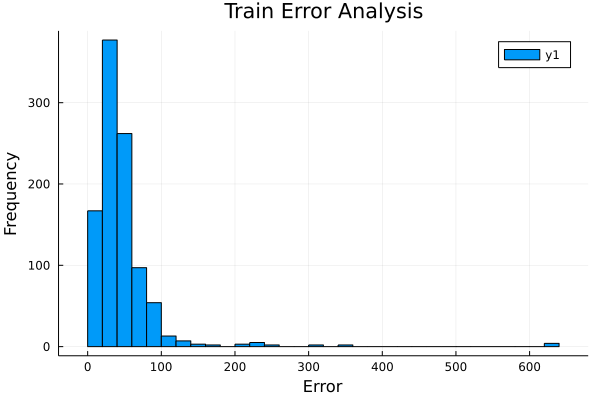

In [43]:
#histogram
#1)train
histogram(df.close,bins=50,title="Train Error Analysis",ylabel="Frequency",xlabel="Error",legend=true)

In [46]:
#Calculating Accuracy
#Cross Validation Method
function cross_validation(train,k,fm=@formula(open~close))
    a=collect(Kfold(size(train)[1],k))
    for i in 1:k
        row=a[i]
        temp_train=train[row,:]
        temp_test=train[setdiff(1:end,row),:]
        linreg=lm(fm,temp_train)
        perf_test=df_original=DataFrame(y_original=temp_test[!,:open],y_pred=predict(linreg,temp_test))
        perf_test.error=perf_test[!,:y_original]
        perf_test[!,:y_pred]
            println("Mean Error for set $i:",mean(abs.(perf_test.error)))
    end
end

cross_validation (generic function with 2 methods)

In [47]:
cross_validation(train,10)

Mean Error for set 1:43.7776
Mean Error for set 2:52.613683513157895
Mean Error for set 3:43.18746862666667
Mean Error for set 4:44.93618443421054
Mean Error for set 5:47.65493192000001
Mean Error for set 6:50.686799706666676
Mean Error for set 7:48.131975749999995
Mean Error for set 8:52.748014000000005
Mean Error for set 9:47.52223718421053
Mean Error for set 10:55.5285498


In [48]:
#....................................Multiple Linear regression.................................................................

In [50]:
fm1 =@formula(open~close+high+low)
linreg1 = lm(fm1,train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

open ~ 1 + close + high + low

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0326523   0.0201125   -1.62    0.1049  -0.0721359   0.00683126
close        -0.739892    0.0357408  -20.70    <1e-74  -0.810055   -0.669728
high          0.883707    0.0327516   26.98    <1e-99   0.819411    0.948003
low           0.857823    0.0265441   32.32    <1e-99   0.805713    0.909933
──────────────────────────────────────────────────────────────────────────────

In [51]:
#R squared Value
r2(linreg1)

0.9999578872394708

In [52]:
#Prediction
test_pred1=predict(linreg1,test)
train_pred1=predict(linreg1,train)

754-element Vector{Union{Missing, Float64}}:
  31.46442397077585
  40.97959849651377
 213.3627510427847
  26.27366888035083
  41.73219995048446
  36.92625408740924
  31.69578606925411
  35.78122833812206
  13.437487508462059
  30.068976332530337
  29.749145281892652
  22.71522192056787
  25.71898366835009
   ⋮
  79.14185386668271
  77.79977003093327
 109.1873752976752
  43.931532757850825
  53.18306120965151
  28.422735612873463
 238.0157133485153
  51.84977268318688
  25.161856472860524
   9.102570596394859
  35.604620124185715
   3.537142847683862

In [59]:
#Mesuring Performance (for test)
perf_test1=df_original1=DataFrame(y_original1=test[!,:open],y_pred1=test_pred1)
perf_test1.error=perf_test1[!,:y_original1]-perf_test1[!,:y_pred1]
perf_test1.error_sq=perf_test1.error.*perf_test1.error;

In [58]:
#Mesuring Performance (for train)
perf_train1=df_original1=DataFrame(y_original1=train[!,:open],y_pred1=train_pred1)
perf_train1.error=perf_train1[!,:y_original1]-perf_train1[!,:y_pred1]
perf_train1.error_sq=perf_train1.error.*perf_train1.error;

In [61]:
#Now printout the values of MAPE and RMSE and visualize them in form of Histogram, to understand didtribution better
#1) test
println("Mean Absolute test error:",mean(abs.(perf_test1.error)),"\n")


Mean Absolute test error:0.18850432771796297



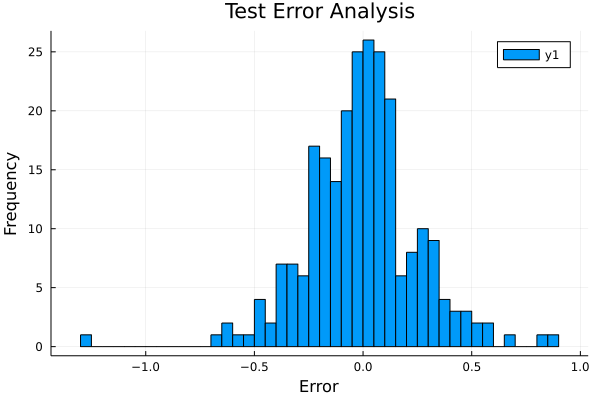

In [62]:
#histogram
#1) test
histogram(perf_test1.error,bins=50,title="Test Error Analysis",ylabel="Frequency",xlabel="Error",legend=true)

In [63]:
#2) train
println("Mean Absolute train error:",mean(abs.(perf_train1.error)),"\n")


Mean Absolute train error:0.2258653965477708



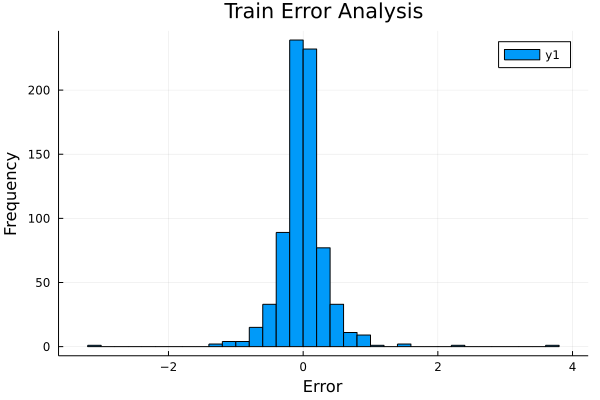

In [64]:
#histogram
#2) train
histogram(perf_train1.error,bins=50,title="Train Error Analysis",ylabel="Frequency",xlabel="Error",legend=true)

In [65]:
#Cross validation
cross_validation(train,10,fm1)

Mean Error for set 1:43.614533853333334
Mean Error for set 2:41.99894826315789
Mean Error for set 3:53.870265786666664
Mean Error for set 4:38.67078939473684
Mean Error for set 5:53.91120089333334
Mean Error for set 6:53.73588026666667
Mean Error for set 7:50.951974828947364
Mean Error for set 8:50.11534960000001
Mean Error for set 9:45.35342143421053
Mean Error for set 10:54.78146657333335
